# Definition

## Project Overview

### Introduction

Recommendation systems in general play an important role in the online world. They allow companies to recommend a certain item for a user with a solid assumption that the user would accept the item. As a result, such systems help in satisfying the user’s taste. Recommendation systems have been used in several applications such as e-commerce, entertainment, finance, and education. For example, in e-commerce it is used to recommend clothes, shoes, jewelry that a person might be interested in buying. Amazon is probably one of the biggest platform out there using such technology. In the entertainment world, it is heavily used by large music/movies streaming companies such as Netflix, Spotify and Google. Moreover, it used in online educational platforms to recommend courses that a student might enroll in. These recommendations benefit both the user and the company at the same time. To be more specific, the user is interacting with recommendations that fit his/her interest. This interaction results in more usage of the online platform and increases the profit of the company. Therefore, the better the recommendation is, the more the user positively interacts with it, the more profit the company attains.

### Domain Background

Several techniques have been proposed to build recommendation systems such as Collaborative Filtering, Frequent Itemset Mining, and Content Based Filtering. Briefly speaking, Collaborative Filtering analyze data about users and predicts what a user likes based on similarities with other users while Content Based Filtering analyzes the behavior of a user and predicts items based on his behavior. Frequent Itemset Mining includes analyzing data to find items the users frequently buy together and recommending a subset of these items for a user buying an item within a certain group of items. Hybrid techniques that combine both Collaborative and Content Based filtering exit in order to improve the prediction success rate. Further details can be found [here](https://en.wikipedia.org/wiki/Recommender_system#Collaborative_filtering). Moreover, Deep Neural Networks are also being explored in Music recommendation systems based on wave signals. More information about the CNNs for music recommendation can be found [here](http://benanne.github.io/2014/08/05/spotify-cnns.html). 

My interest in music, and the fact that I am working on a music streaming mobile application motivates me to pursue a music recommendation system that is flexible and capable of recommending music to users with a high positive rate. 

### Dataset Overview

The dataset includes the music taste of a 1000 users. Part of the data was collected from a music application I developed and offered for testing by some users. In that application, the user behavior was being collected and sent to 2 backends (Firebase, and a private server). The other part of the data was randomly generated for the sake of this project in order to increase the number of users. Furthermore, nearly 5000 songs were hosted on the backend and tagged with different criteria.

##  Problem Statement

As any other mobile application out there, music streaming apps grow as the number of its users grows. In order to achieve a higher user base, the app should be able to efficiently keep its users happy. This can be achieved by providing the user with new songs that he/she might be interested in exploring. Therefore, its is a core requirement to be able to recommend songs that fit the users taste. Machine learning techniques and algorithms play a vital role in fulfilling such requirement. A mix of both Unsupervised and Supervised learning can be used here to build a solution that predicts music of users.

In this project, I will build a Collaborative music recommendation system by analyzing the behavior of users and clustering them into several groups based on the behavior. The system will be able to recommend a certain number of songs for the users based on their taste of music. In order to group the users in user segments based on their behavior (songs listened), an Unsupervised Learning algorithm could be used to determine both the number of groups and the users within each group since the data is not labeled. The Unsupervised algorithm will be model the underlying distribution or structure of the data and learn hidden relations in the data. After this step is complete, a Supervised Learning algorithm can be used to classify in which group an unseen user belongs to. The segments created from the previous step (clustering) will be used as a new “engineered label” for the dataset. This new label can then be thought as the target label that the Supervised algorithm should be using to learn  a mapping function between that allows it to predict the target variable from the input variables.

## Metrics

Since the project is composed of both Supervised and Unsupervised Machine Learning algorithms, this section will tackle each algorithm separately. 
The Unsupervised machine learning algorithm used is a clustering algorithm. In order to evaluate this approach, Silhouette analysis is used to study the inter-cluster distance. This will evaluate how close each user segment is close to other user segments. Using the Silhouette score, the number of clusters will be determined based on the one that achieves the highest value.

**Silhouette Score** focuses on determining how well a point lies in its cluister.
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Euclidean or Manhattan distance can be sued as metric for calculating this score ([1](https://en.wikipedia.org/wiki/Silhouette_(clustering)).

The next part of this project is to determine where a new user fits. In other words, given a new user that hasn’t been clustered before, find a user segment that this user best belongs to. This is achieved by using a supervised algorithm on the labels (user segments) created after clustering. In order to evaluate this technique, F1 score will be used. After building the supervised algorithm, the algorithm will be tested on a labeled test data and evaluate its F1 score.
Regarding the final part of the project, which entails the recommended song, I don’t see a direct way to evaluate this other than using user’s feedback which is not applicable here. However, if both Supervised and Unsupervised techniques work as expected and attain a high score, I would confidently say that they end up as an evaluation for recommending songs.

As per [Sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), the F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

`F1 = 2 * (precision * recall) / (precision + recall)`

`Precision = True Positives/(True Positive + False Positive)`

`Recall = True Positive/(True Positive + False Negative)`

# Analysis & Visualizations

## Data Exploration

In this section, we'll go over the dataset at hand and interpret some statistics of the data in order to have a good understanding of the data we are dealing with. The dataset is composed to 2 sets as described below.

The first sheet shows the number of songs a user listens to based on several genres(Rock, ..., Classical_music) and categories(70s, .., Recent_music). Also, this dataset captures some information about the user himself such as age and gender. The second sheet shows the top 15 songs ID each user listened to.

Note: This dataset is to only be used for the sake of this project. It does not reflect real world data and should not be considered to prove or establish any kind of studies.

Lets start by taking a close look at a very small sample of the data consisting of 8 users as shown in the table below.
Each user has the following features identifying his music behavior:
- **Age**: The age of the user [Numerical]
- **Gender**: Male or female [Text]
- **Country**: The country where the user is located [Text]
- **Rock**: The number of Rock songs the user listened to [Numerical]
- **Pop**: The number of Pop songs the user listened to [Numerical]
- **Jazz**: The number of Jazz songs the user listened to [Numerical]
- **Country_music**: The number of Country songs the user listened to [Numerical]
- **Rap**: The number of Rap songs the user listened to [Numerical]
- **Classical_music**: The number of Classical songs the user listened to [Numerical]
- **70s**: The number of 70’s songs the user listened to [Numerical]
- **80s**: The number of 80’s songs the user listened to [Numerical]
- **90s**: The number of 90’s songs the user listened to [Numerical]
- **2000s**: The number of 2000’s songs the user listened to [Numerical]
- **Recent_music**: The number of recent songs the user listened to [Numerical]

The **Gender & Country** features can be later on transformed into multiple numeric features based on one-hot encoding technique since they are categorical data. 

In addition to the above features, the top 15 songs for each user is also captured as shown below (**top_songs**).

Lets take user number 891 as an example to get a better understanding of the given data.
- Eight year old male from Lebanon.
- Mostly listens to Rap genre(201 songs).
- Least favorite genre is classical music (1 song).
- Most of the songs listened to fall under 70's(100 songs) and 2000's(111 songs) music.
- His top listened to songs are [1571, 749, 1831, 3658, 4983, 2859, 4907, 2775, 3063, 4027, 1763, 1000, 2349, 1949, 1690]

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt; plt.rcdefaults()
import visuals1 as vs1

# Load datasets
# data: consists of all users with their listening behaviour (details of songs they listen to)
# data_topsongs: contains the top 15 songs each user listened to (just the song id)
try:
    data_topsongs = pd.read_csv("dataset_topsongs.csv")
    data = pd.read_csv("dataset3.csv")
    print("Dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Exception while loading dataset")
    
# Sample users
indices = [7, 51, 118, 223, 367, 431, 587, 891]
# Sample songs data
samples = pd.DataFrame(data.loc[indices])
display(samples)
# Sample top_songs
samples_topsongs = pd.DataFrame(data_topsongs.loc[indices])
display(samples_topsongs)

Dataset has 1000 samples with 14 features each.


,Age,Gender,Country,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
7,37,Female,ksa,458,96,174,196,70,138,551,90,326,108,57
51,52,Female,jo,81,135,379,115,112,157,141,550,81,26,181
118,61,Female,ksa,444,86,31,196,7,157,548,17,22,168,166
223,72,Male,ca,46,261,80,82,75,4,13,76,38,67,354
367,39,Female,uae,190,85,11,126,81,50,91,44,153,136,119
431,8,Female,fr,178,32,247,78,52,93,93,295,66,160,66
587,55,Male,leb,297,12,68,122,134,141,146,157,10,250,211
891,68,Female,us,176,405,191,75,197,167,159,115,95,100,742


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
7,798,545,528,3244,1218,3065,411,374,4100,2677,3003,1727,3203,1827,1323
51,944,2623,3724,3653,4388,895,1891,2688,1858,2684,1642,572,4602,3975,3724
118,4003,429,4401,2224,2729,3641,573,580,1225,4558,3131,3600,4931,3857,82
223,2529,4258,709,207,4844,4348,4343,2258,2046,404,2734,246,3876,4719,1109
367,2186,1927,2423,18,2064,3993,3684,4735,987,2032,1930,2952,4691,2908,259
431,344,1286,789,514,3358,3742,436,2453,2004,3276,4091,1905,1642,4824,3387
587,245,434,98,4366,3781,2310,3884,4054,1380,2517,3481,269,4636,335,2799
891,1571,749,1831,3658,4983,2859,4907,2775,3063,4027,1763,1000,2349,1949,1690


In [2]:
# Show some statistics about 1st dataset
print("Data statistics")
display(data.describe())

Data statistics


,Age,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,47.643000,142.073000,149.388000,147.233000,100.262000,100.762000,98.269000,169.870000,169.094000,113.954000,113.840000,171.233000
std,24.115661,107.471893,111.472991,114.488813,57.998441,57.937346,56.716059,153.360884,149.589746,74.577917,75.545612,150.972459
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,62.000000,66.000000,59.000000,48.750000,51.000000,50.000000,69.000000,73.000000,57.000000,56.000000,75.000000
50%,47.000000,124.000000,131.500000,124.500000,99.500000,99.000000,97.000000,130.000000,127.500000,106.000000,105.500000,129.000000
75%,69.000000,184.000000,189.250000,191.000000,151.000000,153.000000,146.250000,206.000000,204.000000,153.250000,157.000000,211.250000
max,89.000000,459.000000,459.000000,459.000000,200.000000,200.000000,200.000000,1028.000000,850.000000,550.000000,413.000000,781.000000


From the above table, we can see that we have a total of 1000 users. 
I will briefly discuss some of the main observations here. 
- The age of the users varies from 7 to 89 with an average of 47.6
- On average, the most listened to genre is Pop and the most listened to category is 70's music.
- On average, the least listened to genre is classical music and the least listened to category is Recent_music.
- Also, we can observe that not all categories are listened to by every user since we have a minimum of 0 songs in each list. A minimum of 1 song is observed for the genres.

In [3]:
# Show some statistics about 2nd dataset
print("Top Songs statistics")
display(data_topsongs.describe())

Top Songs statistics


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2438.686000,2526.963000,2505.339000,2474.884000,2528.206000,2475.934000,2575.970000,2475.028000,2525.349000,2453.491000,2487.309000,2495.284000,2512.357000,2496.35600,2548.165000
std,1479.248238,1433.146063,1406.854837,1449.174851,1437.627774,1456.122181,1464.106596,1431.788055,1470.251287,1465.550644,1450.625712,1438.166243,1475.987879,1455.48167,1446.736768
min,5.000000,3.000000,5.000000,1.000000,3.000000,10.000000,5.000000,4.000000,0.000000,0.000000,1.000000,3.000000,13.000000,21.00000,1.000000
25%,1129.000000,1317.750000,1262.500000,1256.000000,1262.750000,1205.250000,1316.750000,1302.500000,1238.750000,1194.750000,1244.750000,1219.000000,1224.250000,1243.00000,1340.500000
50%,2419.500000,2565.500000,2551.500000,2424.500000,2566.500000,2521.000000,2576.000000,2376.500000,2471.500000,2465.000000,2505.500000,2457.000000,2527.500000,2457.00000,2558.000000
75%,3768.250000,3720.250000,3725.750000,3719.750000,3768.750000,3725.500000,3848.750000,3776.000000,3824.500000,3715.000000,3683.000000,3774.250000,3821.000000,3801.25000,3769.000000
max,4995.000000,4992.000000,4998.000000,4997.000000,4999.000000,4999.000000,4998.000000,4999.000000,4994.000000,4998.000000,4998.000000,4997.000000,4995.000000,4994.00000,4999.000000


The above table shows the top 15 songs ID listened to by each of the 1000 users. 
There is nothing much to interpret here as the table shows the ID's of the songs without any other metrics. 
This dataset is extremely significant in recommending songs that best suits a user's taste later on through the project. 
It's usage will be discussed in more details later.

## Exploratory Visualization

To further explore the dataset, lets look at some visualizations.
We'll visualize some general aspects of the dataset and see whether we can observer a specific trend in the data.

There exists 56 male users from Leb. Below is a sample data


,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
930,246,161,6,14,86,33,0,212,43,105,186
943,259,41,50,23,164,93,166,184,125,37,118
951,360,96,166,186,39,148,738,113,43,57,44
956,363,80,5,100,119,171,509,128,152,26,23
total,18344,5755,5117,5778,5684,5741,22756,5347,5637,6580,6100


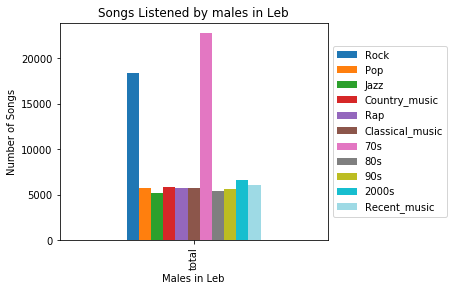

In [4]:
# Load only males from leb and drop unrelated songs columns
leb_m = data[(data.Country == 'leb') & (data.Gender == 'Male')]
leb_m_num = leb_m.drop(['Age', 'Gender', 'Country'], axis=1)

# Append a last row showing the total value for all rows
leb_m_num = leb_m_num.append(leb_m_num.sum().rename("total"))

# Print number of rows (without the total) and show the last 5 rows (including total)
print("There exists {} male users from Leb. Below is a sample data".format(leb_m_num.shape[0]-1))
display(leb_m_num.tail())

# Plot only the total row
vs1.plot_bar_graph(leb_m_num[-1:], 'Songs Listened by males in Leb', 'Number of Songs', 'Males in Leb')

The above graph shows total songs per genre and category that male users from Leb listened to. 
We can observer that such users listen to Rock genre and music from the 70s the most while trying out songs from other genres and categories.

There exists 100 users from CA. Below is a sample data


,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
900,42,298,130,89,49,39,157,91,239,107,53
908,119,391,68,187,59,170,71,245,134,88,456
982,163,383,14,57,12,6,333,142,151,2,7
993,106,297,64,101,48,149,10,187,149,70,349
total,10175,32317,9180,10270,9850,9294,10713,10839,10603,10924,38007


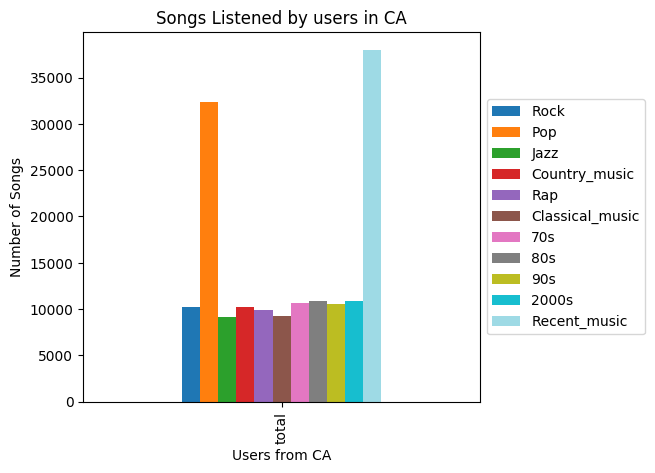

In [5]:
# Load only users from ca and drop unrelated songs columns
ca = data[(data.Country == 'ca')]
ca_num = ca.drop(['Age', 'Gender', 'Country'], axis=1)

# Append a last row showing the total value for all rows
ca_num = ca_num.append(ca_num.sum().rename("total"))

# Print number of rows (without the total) and show the last 5 rows (including total)
print("There exists {} users from CA. Below is a sample data".format(ca_num.shape[0]-1))
display(ca_num.tail())

# Plot only the total row
vs1.plot_bar_graph(ca_num[-1:], 'Songs Listened by users in CA', 'Number of Songs', 'Users from CA')

The above graph shows the total songs per genre and category that users from CA listened to. 
We can observer that such users listen to Pop genre and music from the 2000s the most and while not favoring the rest of the genres and categories.

There exists 38 users from US between the age of 15 and 45. Below is a sample data


,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
840,22,292,43,85,196,57,131,64,82,131,287
845,146,254,105,68,36,21,168,47,189,111,115
873,102,350,59,3,175,135,41,134,2,110,537
955,174,236,32,119,173,185,55,172,192,24,476
total,3426,12619,3195,3087,3541,3939,3555,3977,3956,3678,14641


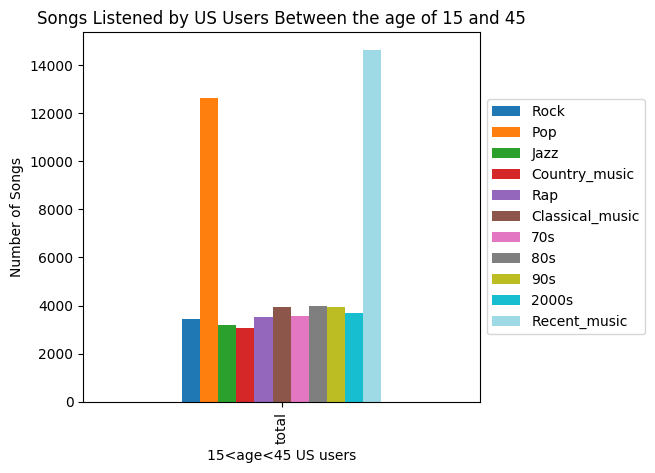

In [6]:
# Load only users from US between the age of 15 and 45 and drop unrelated songs columns
us = data[(data.Country == 'us') & (data.Age.between(15, 45))]
us_num = us.drop(['Age', 'Gender', 'Country'], axis=1)

# Append a last row showing the total value for all rows
us_num = us_num.append(us_num.sum().rename("total"))

# Print number of rows (without the total) and show the last 5 rows (including total)
print("There exists {} users from US between the age of 15 and 45. Below is a sample data".format(us_num.shape[0]-1))
display(us_num.tail())

# Plot only the total row
vs1.plot_bar_graph(us_num[-1:], 'Songs Listened by US Users Between the age of 15 and 45',
                   'Number of Songs', '15<age<45 US users')

Another aspect that we can look at is the importance of age and country. 
Your age and location have a significant impact on building a user's taste of music. 
The graph above captures users in the US between the age of 15 and 45 users old. 
We can observe that such users listen to music from the 2000's and recent music the most while favoring Rap genre and disfavoring Classical genre.

There exists 37 users from BR between the age of 15 and 45. Below is a sample data


,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
946,129,154,107,110,11,51,149,105,81,143,84
966,56,158,174,152,148,94,214,250,204,2,112
985,179,143,112,9,107,115,206,48,67,56,288
988,164,74,160,174,87,43,162,212,65,235,28
total,4336,3857,3943,4325,4048,3239,5244,4663,4585,4291,4964


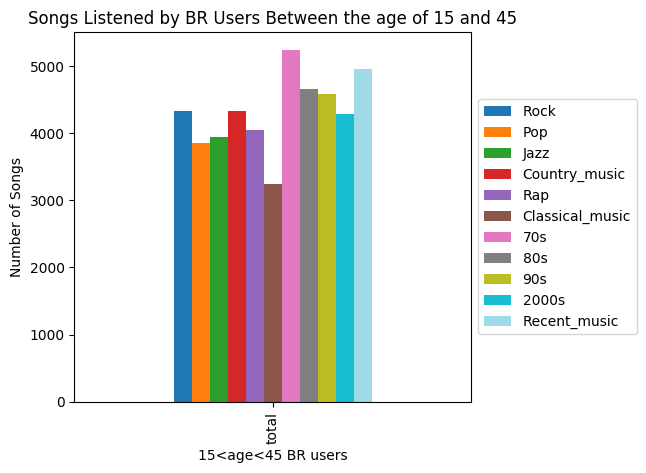

In [7]:
# Load only users from BR between the age of 15 and 45 and drop unrelated songs columns
us = data[(data.Country == 'br') & (data.Age.between(15, 45))]
us_num = us.drop(['Age', 'Gender', 'Country'], axis=1)

# Append a last row showing the total value for all rows
us_num = us_num.append(us_num.sum().rename("total"))

# Print number of rows (without the total) and show the last 5 rows (including total)
print("There exists {} users from BR between the age of 15 and 45. Below is a sample data".format(us_num.shape[0]-1))
display(us_num.tail())

# Plot only the total row
vs1.plot_bar_graph(us_num[-1:], 'Songs Listened by BR Users Between the age of 15 and 45',
                   'Number of Songs', '15<age<45 BR users')

There exists 99 users from jo. Below is a sample data


,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
977,172,153,224,76,98,161,150,300,157,225,52
986,124,100,387,127,95,54,173,195,172,147,200
992,120,146,211,27,62,90,131,412,22,79,12
999,1,23,228,46,101,76,101,190,3,103,78
total,10591,10725,33231,9673,10241,9344,11526,37506,11804,10701,12270


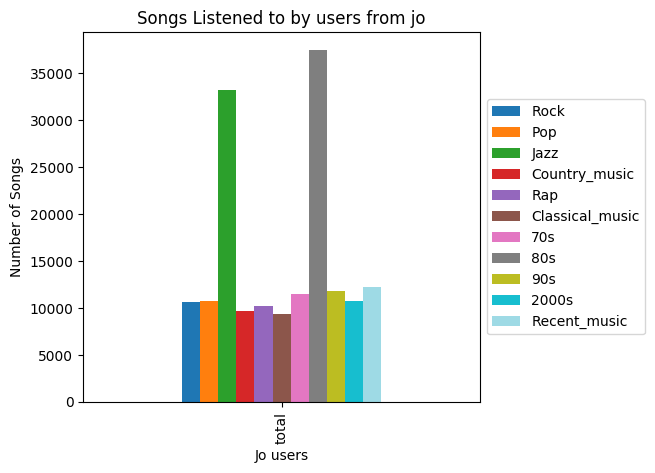

In [8]:
# Load only users from jo and drop unrelated songs columns
df = data[(data.Country == 'jo')]
df = df.drop(['Age', 'Gender', 'Country'], axis=1)

# Append a last row showing the total value for all rows
df = df.append(df.sum().rename("total"))

# Print number of rows (without the total) and show the last 5 rows (including total)
print("There exists {} users from jo. Below is a sample data".format(df.shape[0]-1))
display(df.tail())

# Plot only the total row
vs1.plot_bar_graph(df[-1:], 'Songs Listened to by users from jo','Number of Songs', 'Jo users')

From the above graph we can observe that we have 99 users from jo and the majority of users favor Jazz genre and songs from the 80's.

From the above 2 graphs we can observe that the country has a significant effect on the user's music taste.

There exists 523 female users. Below is a sample data


,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
992,120,146,211,27,62,90,131,412,22,79,12
994,114,113,106,161,85,177,138,190,127,121,180
996,275,198,182,56,62,57,419,38,57,173,143
998,180,18,349,3,74,65,8,396,100,90,95
total,73935,79562,77451,53142,51960,48888,85849,87447,60045,60555,91043


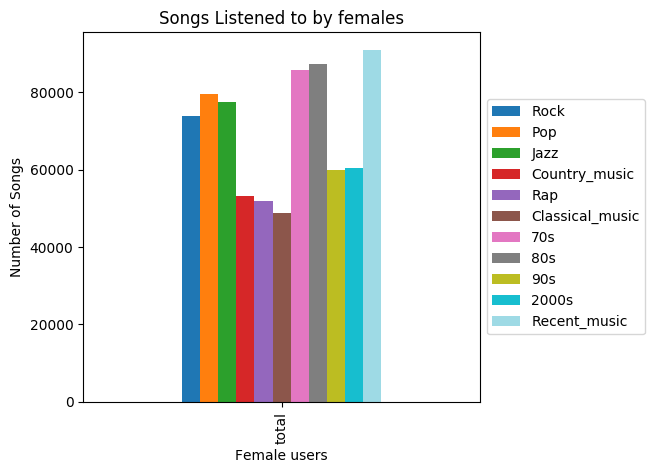

There exists 477 male users. Below is a sample data


,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
993,106,297,64,101,48,149,10,187,149,70,349
995,185,114,131,84,10,175,85,151,128,84,251
997,56,24,48,72,170,139,76,67,75,204,87
999,1,23,228,46,101,76,101,190,3,103,78
total,68138,69826,69782,47120,48802,49381,84021,81647,53909,53285,80190


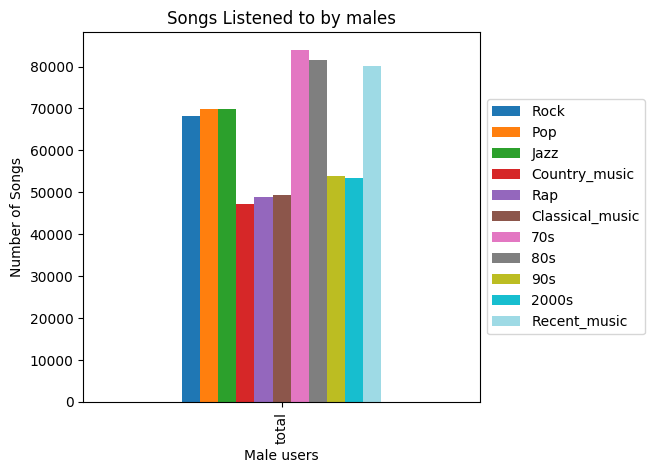

In [9]:
# Load only Female users drop unrelated songs columns
df = data[data.Gender == 'Female']
df = df.drop(['Age', 'Gender', 'Country'], axis=1)

# Append a last row showing the total value for all rows
df = df.append(df.sum().rename("total"))

# Print number of rows (without the total) and show the last 5 rows (including total)
print("There exists {} female users. Below is a sample data".format(df.shape[0]-1))
display(df.tail())

# Plot only the total row
vs1.plot_bar_graph(df[-1:], 'Songs Listened to by females','Number of Songs', 'Female users')

# Load only Male users drop unrelated songs columns
df = data[data.Gender == 'Male']
df = df.drop(['Age', 'Gender', 'Country'], axis=1)

# Append a last row showing the total value for all rows
df = df.append(df.sum().rename("total"))

# Print number of rows (without the total) and show the last 5 rows (including total)
print("There exists {} male users. Below is a sample data".format(df.shape[0]-1))
display(df.tail())

# Plot only the total row
vs1.plot_bar_graph(df[-1:], 'Songs Listened to by males','Number of Songs', 'Male users')

Finally, we can go ahead and check whether gender plays an important role in the user's music taste or not.
The first graph above shows all females and their music taste while the second graph shows male's music taste.

From both of the above graphs we observe that gender doesn't play a critical role in differentiating a user's music taste within our dataset.

Therefore gender feature alone is not of high importance in predicting a user's music taste.

### Feature Relevance

In some cases we might have a feature that is tightly coupled with another feature(s) allowing us to exclude it from the features in order to reduce the feature dimension and then predict it later on when needed. In other words, this allows us to identify whether a feature is relevant to understand the user's music taste.

One way to achieve this is using Supervised learning. We can train a supervised learner on a test data while removing the feature to be tested and then checking how well the learner scores when predicting the removed feature using the **R^2 score**. The best possible value of the **R^2 score** is 1. The score is mainly used to test a hypothesis or to predict a future outcome.

The implementation is shown below.

I tried a few runs of the below code while changing the targeted feature. The highest score observed was when using **Rock** as the targeted feature (**R^2 score of 0.49**). In other words the learner can predict this feature from other features with a 49% accuracy. Since this is not a high score, I will not count it as a irrelevant feature.

Very low scores were observed even negative ones indicating that the model failed to fit the data.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# One hot encoding of categorial features
encoded_data = pd.get_dummies(data)
encoded_data1 = encoded_data.drop(['Rock'], axis=1)
display(encoded_data1.head())

# Split the data into training and testing sets(0.25)
X_train, X_test, y_train, y_test = train_test_split(encoded_data1, encoded_data['Rock'], test_size=0.25, random_state=50)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=50)
regressor.fit(X_train,y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print ("Score: {}".format(score))

,Age,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,...,Country_am,Country_br,Country_ca,Country_de,Country_fr,Country_jo,Country_ksa,Country_leb,Country_uae,Country_us
0,89,188,456,71,79,111,138,543,78,50,...,0,0,0,0,0,1,0,0,0,0
1,18,162,77,125,54,33,327,128,21,181,...,0,0,0,0,0,0,0,1,0,0
2,55,44,455,92,20,32,15,496,16,87,...,0,0,0,0,0,1,0,0,0,0
3,67,184,271,103,100,108,59,335,115,112,...,0,0,0,0,0,1,0,0,0,0
4,21,427,28,31,89,31,29,120,4,28,...,0,0,0,0,0,0,0,0,0,1


Score: 0.4908300884219124


To move further with our discussion regarding relevant features, let's plot a scatter matrix. 
A scatter matrix shows whether a possible relation between 2 variables exists or not. It will plot a graph for every 2 features as shown below.
If a feature is relevant for identifying a user, then the scatter matrix should not show any correlation between the feature and all other features. On the other hand, if a feature is not relevant for identification, the scatter matrix should show some correlation between the feature and other features. 

From the below graph, we can observe that there are no 2 features with a solid correlation. Hence, we were getting low and negative **R^2 score** in the above section while attempting to predict a feature from other features.

We can validate our previous hypothesis regarding **Rock** genre by looking at the **Rock and 70's** graph and observing a minor correlation between the 2 features.

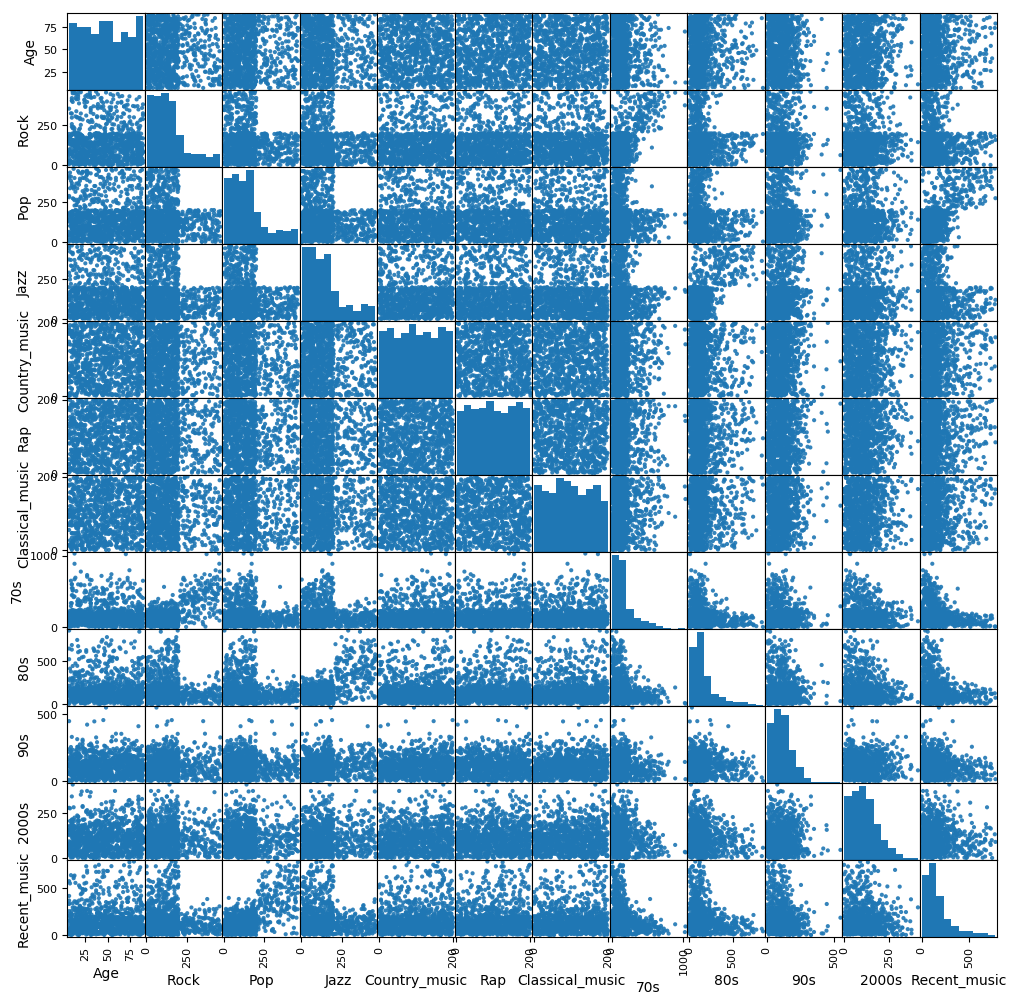

In [11]:
from pandas.plotting import scatter_matrix
import seaborn as sns 

# Another nice way for plotting
# sns.set(style="ticks")
# sns.pairplot(data)

scatter_matrix(data, alpha=0.9, figsize=(12, 12))
plt.rcdefaults()
plt.show()

One more helpful visualization is a heatmap of the features' correlation values of the data. 
The heatmap should give us a clear insight whether 2 or more features are correlated. The higher and stronger the correlation (link between 2 features) is, the lighter the color of the heatmap for the addressed 2 features is.

From the heatmap graph below, we can observe that the majority of the boxes are very dark indicating that the features are not correlated. 
We cal also observer a lighter color (near 0.5) between **Rock and 70's** indicating a slight correlation as seen and described above in the scatter matrix and supervised learner approaches.
The diagonal of the heatmap is almost white since it describes the correlation between the same feature.

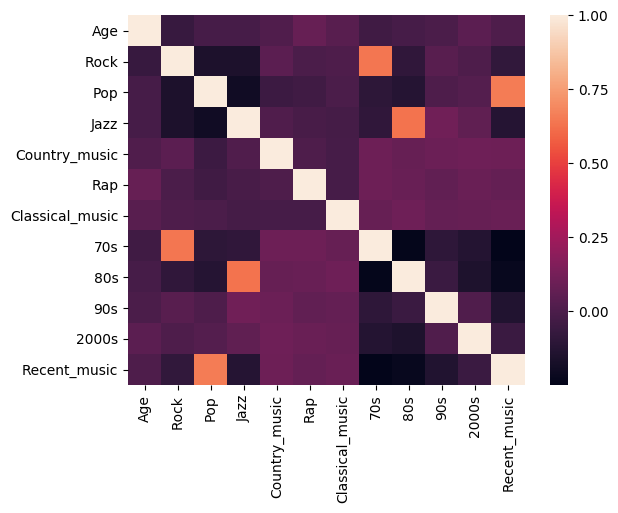

In [12]:
sns.heatmap(data.corr())
plt.rcdefaults()
plt.show()

## Algorithms and Techniques

The recommendation system should work as follows:
1. Group users into several clusters using Unsupervised Learning algorithm.
    - The number of clusters will be determined later based on several trials and picking the one that achieves the highest Silhouette Score.
2. Label each cluster with a tag such as Pop_Rock_Jazz lovers.
3. Recommend songs for users within each cluster based on similar users.
    - This can be achieved by several ways one of which is finding the most common top_played song in the cluster and recommend it to the user if he hasn’t listened to it. If the user has listened to it, then recommend the next most common one and so on. 
4. Assign an unseen user to one of the labeled groups using Supervised Learning algorithm in order to be able to recommend him/her songs.

For the Unsupervised Learning part, **K-means** algorithm will most probably be used. One note here is that I haven't yet visualized my dataset (this step will be done in Part 2 of the project). As such, if the data doesn’t look well structured for K-means algorithm, I will give GMM a try and compare the results of both algorithms. 

Once the user segments are ready (clustering is complete), each segment should include a variety of songs representing a certain interest between the different users in the cluster. Here comes the role of the **Top_songs mapping table**. The most played song per user can be found via this mapping. Once we get the most played song for all users in the mapping, we can then find the common most played song within the entire cluster. This song will serve as a solid candidate to recommend for users within the same cluster.

Regarding step number 4, using Supervised Learning to assign an unseen user to a cluster, **Support Vector Machine (SVM)** algorithm will be used to classify the label for the new user. As discussed previously, the label will indicate the user segment to which this unseen user belongs to.

Finally, we can confidently recommend this unseen user a few songs to listen to. I would also like to note here, that I will also use Naive Bayes algorithm here and compare its results with SVM.

One possible flaw that I can already see in this system is that it will probably frequently recommend the most common songs to users. As a mitigation of this flaw, we can allow the system to select either the most common top_played song within the cluster or a  different song from the top played list of any user at random. This way, we’ll make sure that the users explore new or unpopular songs as well.

## Benchmark

As this project tackles an unsupervised machine learning algorithm, a benchmark model is not very clear. However, a simple and benchmark model could create user segments based on a naive clustering mechanism where each user is put in a cluster based on the highest number of music genre he listened to while ignoring the time window of the songs (70s,...,recent_music). This can also be referred to as a naive user segmentation technique that servers as a good sanity check for deciding whether the learned clusters are producing any meaningful improvements.

For example, given the below two users, our naive clustering mechanism would add the first user to a cluster where users listen to Classical music the most while the second user would be added to a cluster where users listen to Jazz music the most. As such, 6 clusters can be formed (1 for each genre) and we can evaluate the effectiveness of this approach as described below.

In order to set a benchmark for the naive user segmentation technique, the **Silhouette score** can be computed for each of the 6 clusters and compared to the ones computed from the advanced model to be built.

Another way to compare the two models is to complete the clustering step and move on to building the Supervised learner. After the prediction model is built, we can compare the naive model to the advanced one by computing the **accuracy** or **F1 score** based on a labeled hand crafted testing set. Now, a baseline can be set and modifications to the Unsupervised algorithm can be considered as improvements if the Supervised Learner performs better. This technique is known as the gold standard test. 

It is worth to note that I am not very confident with building the handcrafted labeled dataset, but nevertheless it is worth mentioning here as a valid and solid technique to compare both models.

In [13]:
display(data.loc[[0, 222]])

,Age,Gender,Country,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,2000s,Recent_music
0,89,Male,jo,14,188,456,71,79,111,138,543,78,50,110
222,50,Female,ca,4,339,159,177,37,14,88,26,39,239,338


# Methadology

## Data Preprocessing

### Detecting Outliers 

Outliers are data points that don't quite fit with the rest of the data points distribution. It is very important to find out the outliers in the dataset before attempting to run any algorithms. Outliers can skew the data and result in different results that don't represent the majority of the datasets.

Clustering techniques and **K-means** in specific are affected by outliers and skewed data. Therefore, in this section we'll attempt to find outliers in the dataset.

Below, we use the **Tukey's range test** to detect any outliers in our data.
**Outliers** are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.
**Suspected outliers** are are slightly more central versions of outliers: either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.

493 outliers were found out of which 118 are duplicates.
This is a very high number constituting 49% of the data. As such, we will not remove these outliers. Instead, we are going to visualize the outliers and figure out why do we have a high number of them.


The duplicate outliers constitute 11.8% of the data set. I still think this is a high number of sample points to remove as we might lose some aspects of the dataset. My initial guess is to keep the discovered outliers in the dataset at least for now. Once the recommender system is finalized, we can come back, remove the **duplicate** outliers, and check whether we got a better result.

In [14]:
# Don't include these columns while looking for outliers
outliers = []
df =  data.drop(['Age', 'Gender', 'Country'], axis=1)

# Use Tukey's range test to find outliers quantitatively
# For each feature find the data points with extreme high or low values
for feature in df.keys():
    # 25th percentile of the data for given feature
    Q1 = np.percentile(df[feature], 25)
    # 75th percentile of the data or given feature
    Q3 = np.percentile(df[feature], 75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    # Extract outliers for the given features
    feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
    # Add the outliers of the given feature to list of outliers
    outliers.extend(feature_outliers.index)
    
# Calculate number of duplicate outliers
seen, dup = [], []
for x in outliers:
    dup.append(x) if(x in seen and x not in dup) else seen.append(x)          
print("Total number of outliers is: {}, percentage {}".format(len(outliers), round(len(outliers)/len(df) * 100, 1)))
print("Number of duplicate outliers is: {} , percentage {}".format(len(dup), round(len(dup)/len(df) * 100, 1)))
print("Duplicates {}\n".format(dup))
print("Sample of duplicate outliers\n", df.loc[dup[:5]])

# Remove the dumplicate outliers
# good_data = data.drop(data.index[dup])
# good_data = data.drop(data.index[seen])
# print("New data size after removing duplicate outliers {}:".format(len(good_data)))
# display(good_data.head())

good_data = data # Comment if you uncomment the code above

Total number of outliers is: 493, percentage 49.3
Number of duplicate outliers is: 118 , percentage 11.8
Duplicates [7, 35, 53, 65, 86, 91, 118, 138, 174, 177, 182, 192, 231, 255, 273, 296, 328, 347, 350, 353, 404, 416, 444, 480, 505, 613, 657, 683, 700, 751, 762, 785, 786, 830, 874, 919, 947, 978, 0, 2, 5, 108, 111, 132, 140, 221, 268, 270, 279, 289, 302, 383, 389, 393, 414, 420, 430, 440, 475, 543, 583, 598, 689, 717, 720, 906, 939, 963, 964, 126, 622, 23, 159, 314, 361, 401, 661, 4, 50, 52, 69, 87, 110, 115, 122, 178, 181, 217, 259, 291, 301, 399, 436, 441, 462, 482, 497, 537, 569, 594, 600, 610, 629, 630, 631, 637, 701, 742, 746, 757, 801, 817, 823, 876, 891, 892, 908, 932]

Sample of duplicate outliers
     Rock  Pop  Jazz  Country_music  Rap  Classical_music  70s  80s  90s  \
7    458   96   174            196   70              138  551   90  326   
35   418  163    49            163   58               21  599   46    0   
53   431  117   124            148  155                8 

### Visualizing Outliers

In order to get a better understanding of the outliers, we will construct a Box Plot for various features.
A Box Plot is a way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. Anything outside the whiskers of the Box Plot (above the maximum or below the minimum) donates an outlier. The middle horizontal line in the box represents the median of the data distribution. The entire box represents 50% of the data.

For example, lets discuss **Rock** feature. We can first observer that the median is somewhere near 150 and that 50% of the users listen to ~50-190~ songs. We can also observer the dots above the maximum whisker representing data points that are recognized as **suspected outliers**.

Looking at **70s** feature we can observe that users favors this category and that some users highly favor this category as illustrated by the close black dots at the top whisker. We can also see that we have a few dots floating around at the top which could represent **extreme outliers**.

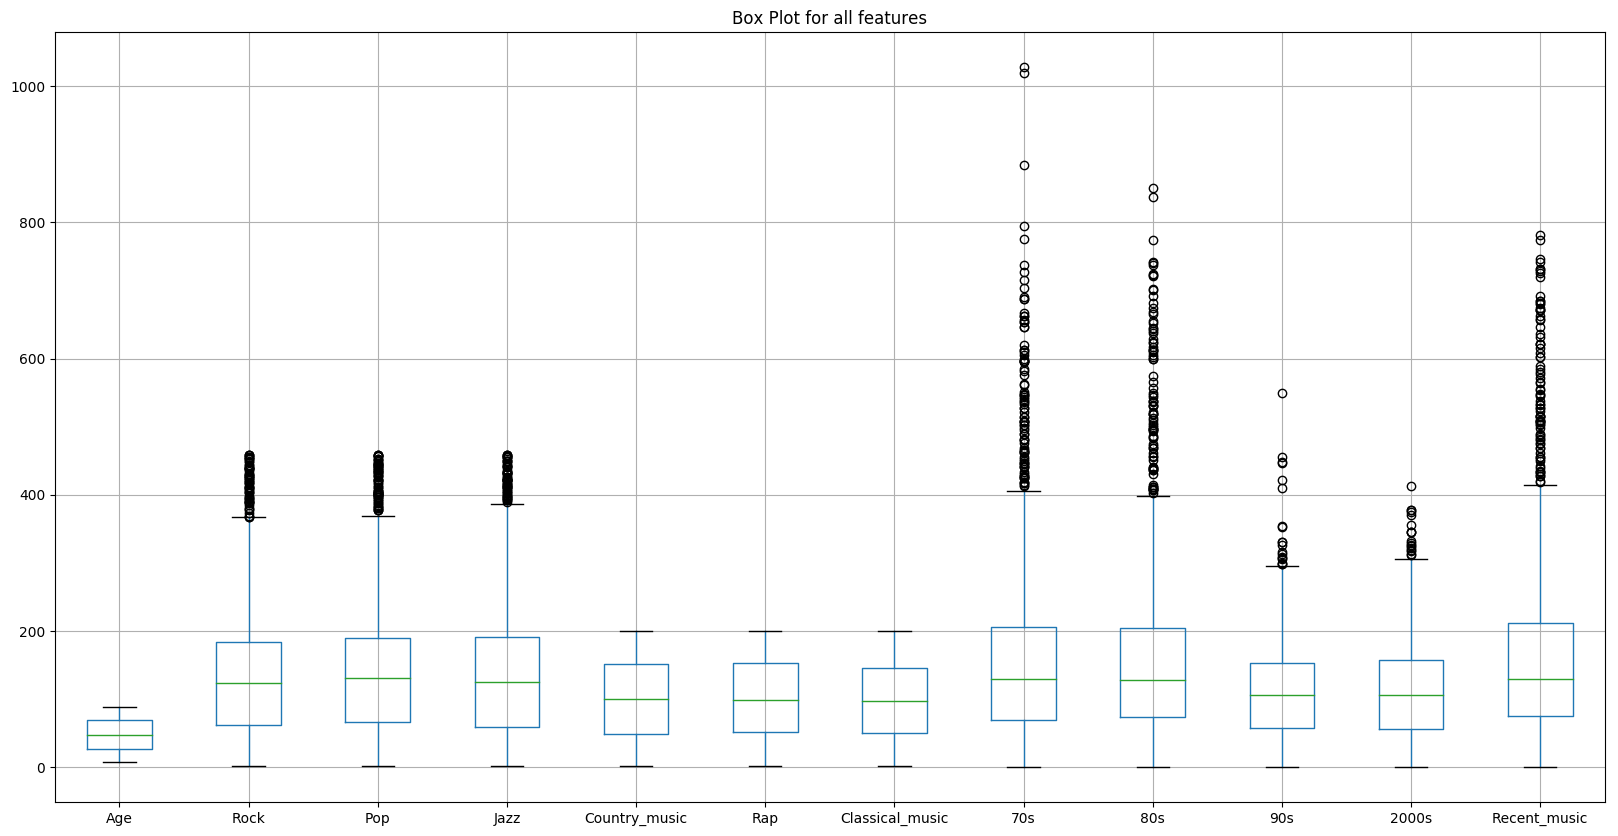

In [15]:
# Show a boxplot to analyze the data distribution qualitatively 
good_data.boxplot(return_type='axes', figsize=(20,10))
plt.title("Box Plot for all features")
plt.rcdefaults()
plt.show()

We'll analyze this a bit further by constructing a swarm plot. A swarm plot will show us the distribution of the data while plotting all data points (without overlaps, very close to each other). This allows us to take a closer look at where the data is more focused. This observation cannot always be seen in a Box Plot.

Below we draw a swarm plot for all features and observe the following:

- Regarding **Rock, Pop, and Jazz**
    - the majority of the users listens to such genres within ~0-200 songs.
    - It also shows that their exists a group of users who listen to 200-500 songs for these genres.
    - Users who listens to high songs for these genres are the points previously identified as outliers for these features.
- Regarding **Country_music, Rap, Classical_music**
    - All users listens to songs within the range of 0-200.
    - No users are highly favor these genres.
- Regarding **70s, 80s, and Recent_music** categories
    - The majority of users listens to the same number of songs within these categories.
    - A group of users are more into these categories as evident by the points ranging from 250-1000.
    - A few possible outliers exists in the shape of random points floating alone on the y axis. This is also shown in the above Box Plot as well.
- Regarding **90s and 2000s**
    - All users listen to a songs of these categories within the same range 0-300.
    - A few points are floating at the top which could be possible outliers as shown in the previous Box Plot. 

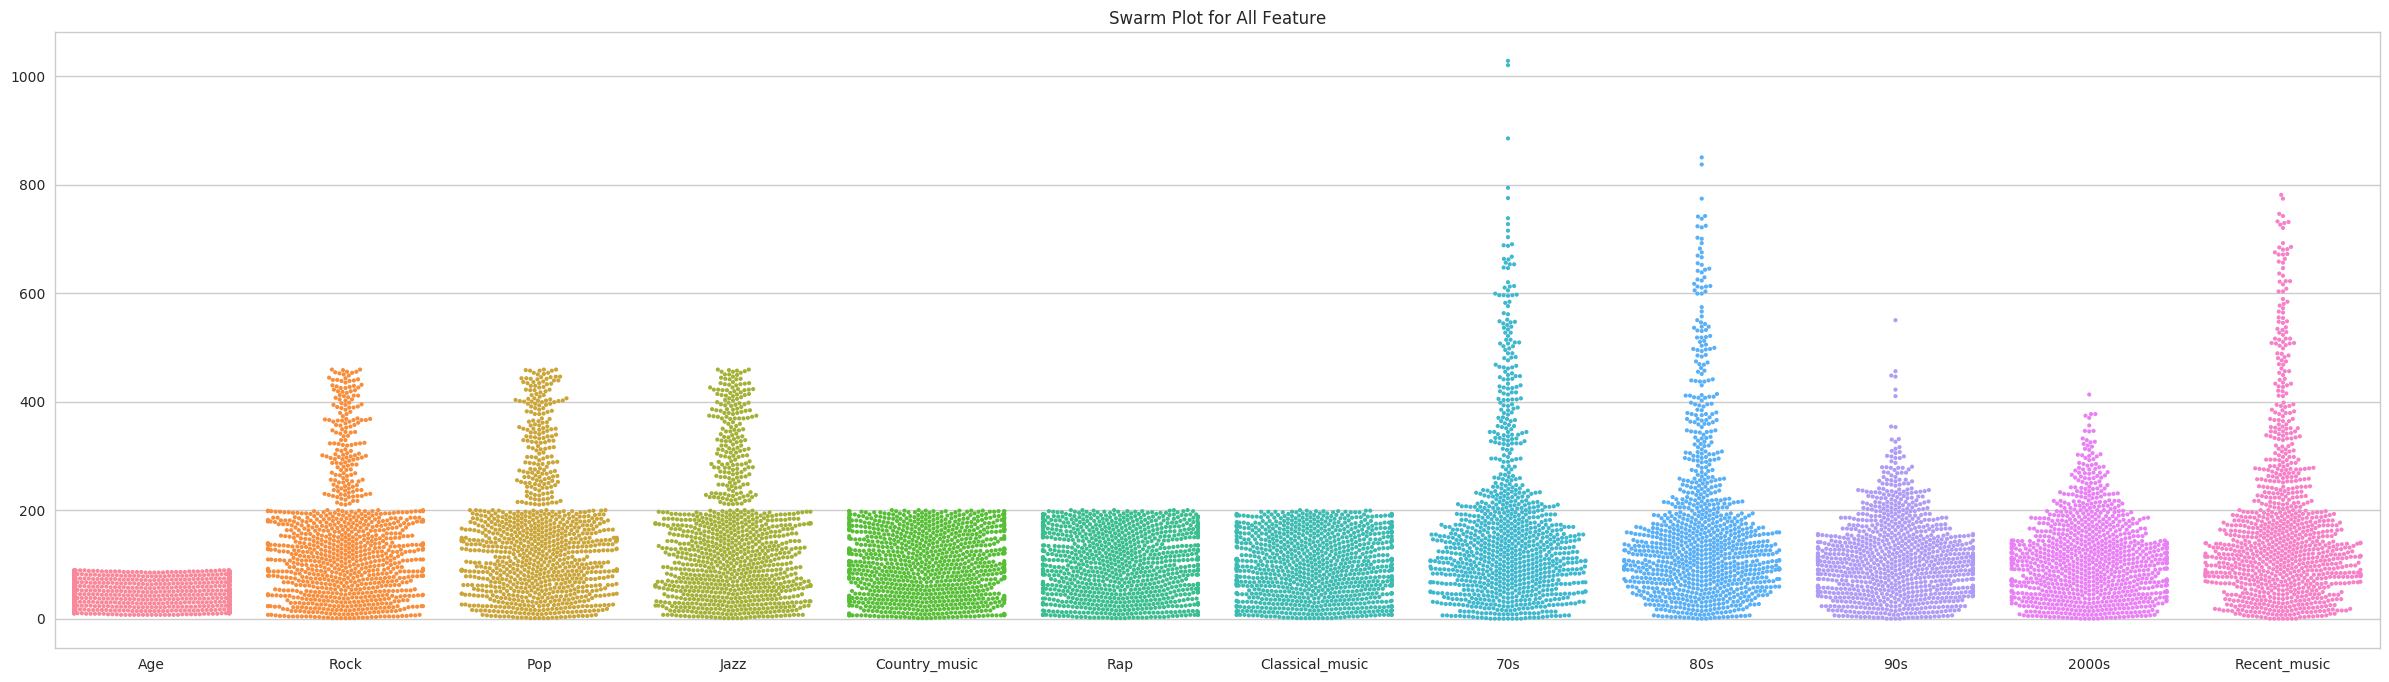

In [16]:
plt.figure(figsize=(30,8))
sns.set(style="whitegrid")
ax = sns.swarmplot(data=good_data,  size=3)
plt.title("Swarm Plot for All Feature")
plt.rcdefaults()
plt.show()

Finally, we are going to combine both Box Plot and Swarm Plot for a particular feature for a better observation.
From the below diagram, it is very clear what the detected outliers are. It also gives me a solid reason to not remove such outliers from the data since, they represent a continuation of a main group of users who highly favor a specific genre.

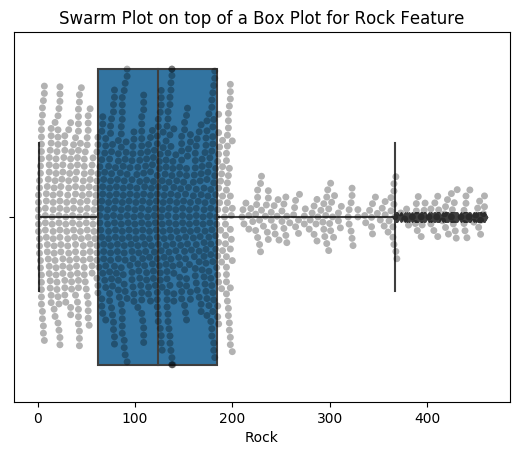

In [17]:
sns.boxplot(good_data['Rock'])
sns.swarmplot(good_data['Rock'], color="black", alpha='0.3')
# sns.violinplot(good_data['Rock'], inner=None)
plt.title("Swarm Plot on top of a Box Plot for Rock Feature")
plt.rcdefaults()
plt.show()

### Categorical Features Transformation

As mentioned earlier Country and Gender features are non-numerical data. Instead, they represent Text categories. As such, we'll use one-hot encoding technique to transform them into numerical data.

For example, for the Gender feature:
    - The dataset consists of only male and female genders.
    - We can split the Gender feature into 2 features: Gender_male and Gender_female
    - Each new feature will have a numerical binary representation
    - If user is female, the Gender_female will be set to 1 and the Gender_male will be set to 0 and vice versa

In [18]:
# One hot encoding of categorial features
good_data_encoded = pd.get_dummies(good_data)
print("good_data_encoded dataset has {} samples with {} features each.".format(*good_data_encoded.shape))
display(good_data_encoded.head())

good_data_encoded dataset has 1000 samples with 24 features each.


,Age,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,...,Country_am,Country_br,Country_ca,Country_de,Country_fr,Country_jo,Country_ksa,Country_leb,Country_uae,Country_us
0,89,14,188,456,71,79,111,138,543,78,...,0,0,0,0,0,1,0,0,0,0
1,18,385,162,77,125,54,33,327,128,21,...,0,0,0,0,0,0,0,1,0,0
2,55,4,44,455,92,20,32,15,496,16,...,0,0,0,0,0,1,0,0,0,0
3,67,4,184,271,103,100,108,59,335,115,...,0,0,0,0,0,1,0,0,0,0
4,21,17,427,28,31,89,31,29,120,4,...,0,0,0,0,0,0,0,0,0,1


### Feature Transformation Using PCA

Principle Components Analysis (PCA) can be used to reduce the dimensionality of the dataset and allow better visualizations.
It helps in data visualization by reducing the dimensions to 2D or 3D. It is easier to plot and understand such dimensions compared to 6 or 10 dimensions (which might be nearly impossible to visualize at some points).

One important note about PCA is that is highly affected by the data scale. As such, its input should be scaled before for better results if the features have different scales. That being said, the PCA can be plotted against the covariance or correlation matrices. Plotting against the covariance matrix is recommended if the data scales are similar while using the correlation matrix is recommended when the variables scales are not similar.

Using PCA on a dataset calculates the dimensions which best maximize variance of the data. The dimensions with highest variance are the ones that represent the significant "trends or information" within the dataset. It results in compound combinations of features that best describes our users.

In the blow section, we apply PCA and describe the results.

Explained variance: [ 0.32523088  0.28930797  0.17478398  0.07209876  0.07089837  0.06768003]
First 3 dimensions explained variance: 0.7893228363154177


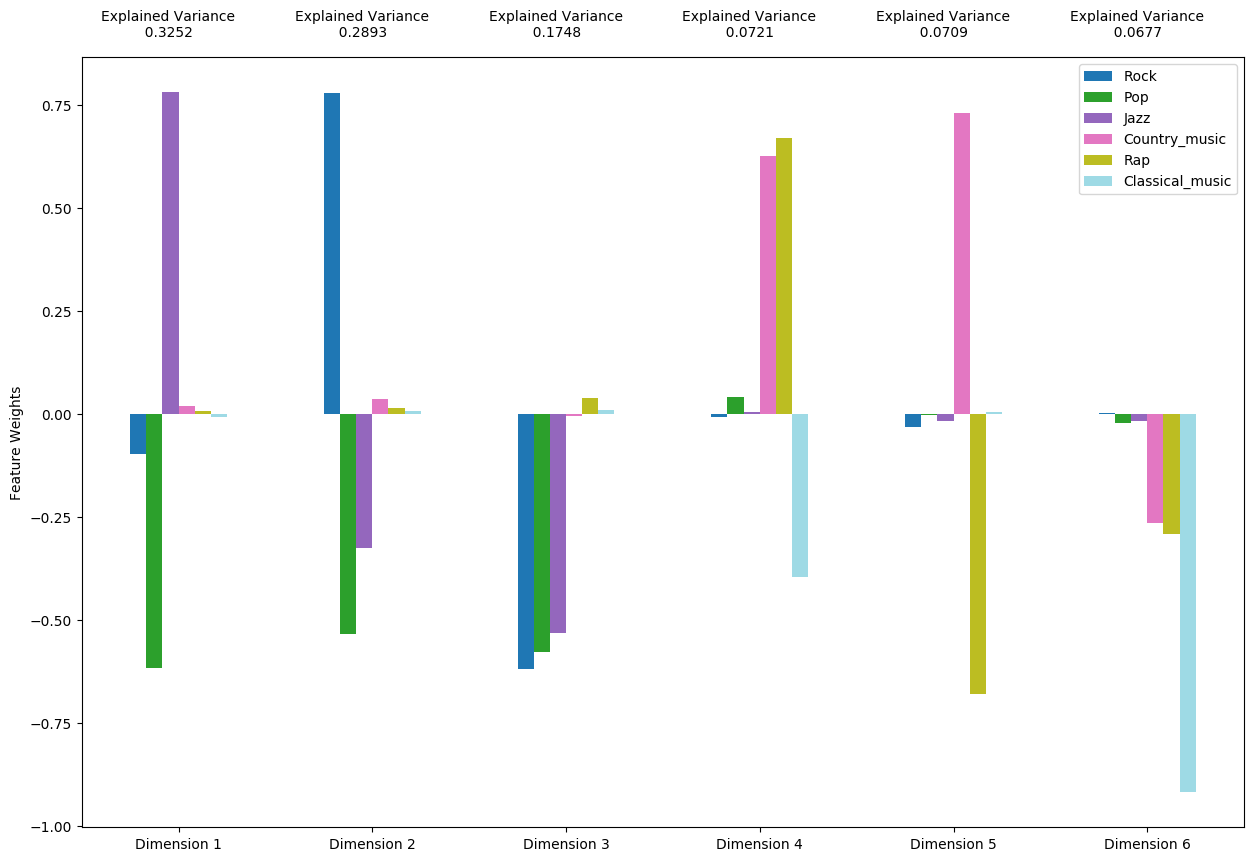

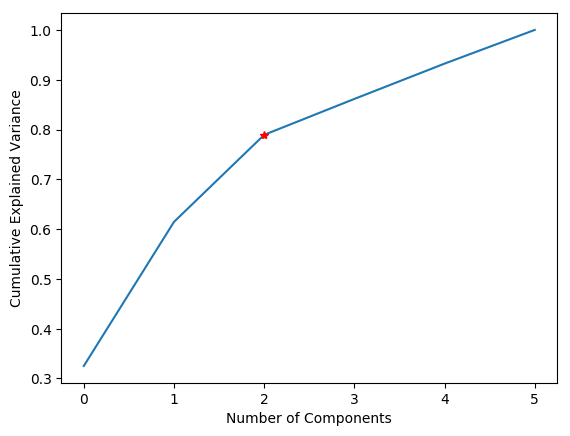

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Remove the one hot encoded country feature
l = list(good_data_encoded.filter(regex='Country'))
if 'Country_music' in l:
    l.remove('Country_music')
music_data = good_data_encoded.drop(l, axis=1)
# Remove other features
music_data = music_data.drop(list(music_data.filter(regex='Gender')), axis=1)
music_data = music_data.drop(['Age'], axis=1)
music_data = music_data.drop(['70s'], axis=1)
music_data = music_data.drop(['80s'], axis=1)
music_data = music_data.drop(['90s'], axis=1)
music_data = music_data.drop(['2000s'], axis=1)
music_data = music_data.drop(['Recent_music'], axis=1)

sample = pd.DataFrame(music_data.loc[[1, 2, 4, 367]], columns = music_data.keys()).reset_index(drop = True)

# Scale the input vartiables before
# scaled_features = StandardScaler().fit_transform(music_data.values)
# scaled_features_df = pd.DataFrame(scaled_features, index=music_data.index, columns=music_data.columns)
# print(scaled_features_df.head())
# pca = PCA(n_components=len(scaled_features_df.columns)).fit(scaled_features_df)

# Apply PCA by fitting the data with the same number of dimensions as features
pca = PCA(n_components=len(music_data.columns)).fit(music_data)

print("Explained variance: {}".format(pca.explained_variance_ratio_))
print("First 3 dimensions explained variance: {}".format(sum(pca.explained_variance_ratio_[:3])))

# Generate PCA results plot
pca_results = vs1.pca_results(music_data, pca)
plt.rcdefaults()
plt.show()

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(2, .789, 'r*')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');
plt.rcdefaults()
plt.show()

Since we have multiple features in our dataset, applying PCA is a crucial step towards visualizing the data and later applying clustering techniques. 

Before discussing the PCA results, let's look at the data used before applying PCA.
By trial and error, I found the best results by not using all features. Instead I dropped all the  music categories in addition to age and gender features. Since all the left variables have the same scale, scaling the data before applying PCA is not required.

PCA is applied on the new subset of the dataset using the same number of features as the dimensions of the PCA.
This allows us to interstage the different principle components that best explains the variance of data hence, capturing the most information of our users.

From the above graph we can observe the following:
 - The first 3 principle components explain ~79% of the variance. In other words, these 3 components contain the most information about the users.
 - The 1st component explains 32.5% of the variance by capturing users who highly favor Jazz music and disfavor Pop genre while listing to the rest of the genres at almost the same amount.
 - The 2nd component explains ~29% of the variance by capturing users who highly favor Rock genre while disfavoring Pop and Jazz genres.
 - The 3rd component explains 17% of the variance by capturing users who don't favor Rock, Jazz, and Pop genres while listening to other genres at a same pace.
 - the 4th component explains 7% of the variance by capturing users who listens to Country and Rap music while disfavoring Classical genre.
 
Therefore, the first 3 components are the crucial ones where most of the information is captured. This is also captured by the plotting the cumulative explained variance as a function of the number of components as shown in the above figure.

## Implementation

This section focuses on the following:
 - Applying PCA with the number of components that best explains the variance
 - Plotting the PCA and observing the feature projections
 - Applying K-means clustering on the PCA reduced data
 - Analyzing sample points after PCA reduction, plotting them within the clusters, and explaining the results
 - Creating a new engineered featured by labeling the data as per their assigned cluster
 - Building a Supervised learner that will predict the engineered feature
 - Recommending Songs to users

### Reducing Dimensions

Lets start by applying PCA on the subset of the data discussed earlier using the first 3 dimensions since they explain ~79% of the variance.

Looking at some sample data of the PCA result, it is clear that the dimensions have been reduced to 3 dimensions (3 new features) from 6 and the data values have been changed to reflect the new dimensions.

In [20]:
# Reduce the data to 3 dimensions
pca = PCA(n_components=3).fit(music_data)
reduced_data = pca.transform(music_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

# Reduce sample points to 3 dimensions
display(sample)
pca_samples = pca.transform(sample)
pca_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
print(pca_samples)

,Rock,Pop,Jazz,Country_music,Rap,Classical_music
0,385,162,77,125,54,33
1,4,44,455,92,20,32
2,17,427,28,31,89,31
3,190,85,11,126,81,50


   Dimension 1  Dimension 2  Dimension 3
0   -85.298703   205.266667  -122.802197
1   318.527617  -153.523614   -21.216690
2  -253.101461  -209.953994   -20.576600
3   -70.625933   116.417218    78.564152


Lets plot the reduced data using a scatter plot where the axes are the principle components. In addition we'll show the original features projections along the components. Such diagram helps in interpreting the reduced data and finding relationships between the principle components and the original features.

Looking at the below graph we can observe the following:
- A user in the lower left part of the graph listens heavily to Pop genre.
- A user in the lower right corner of the graph listens heavily to Jazz.
- A user located near the Rock arrow indicates that he is best explained by the Rock feature.
- A user somewhere in the center indicates a user who doesn't listen to Rock, Pop, Jazz a lot, instead he focuses more on other genres.

Since the graph is in 3D, it not as easy as 2D graphs to interpret more relationships.

i 0 v [-0.0961631   0.77939241 -0.61828896]
i 1 v [-0.6159709  -0.53372469 -0.57755717]
i 2 v [ 0.78152923 -0.32576832 -0.5314447 ]
i 3 v [ 0.02055395  0.03625006 -0.00355022]
i 4 v [ 0.00719246  0.01404722  0.03984647]
i 5 v [-0.00838909  0.00700214  0.01061442]


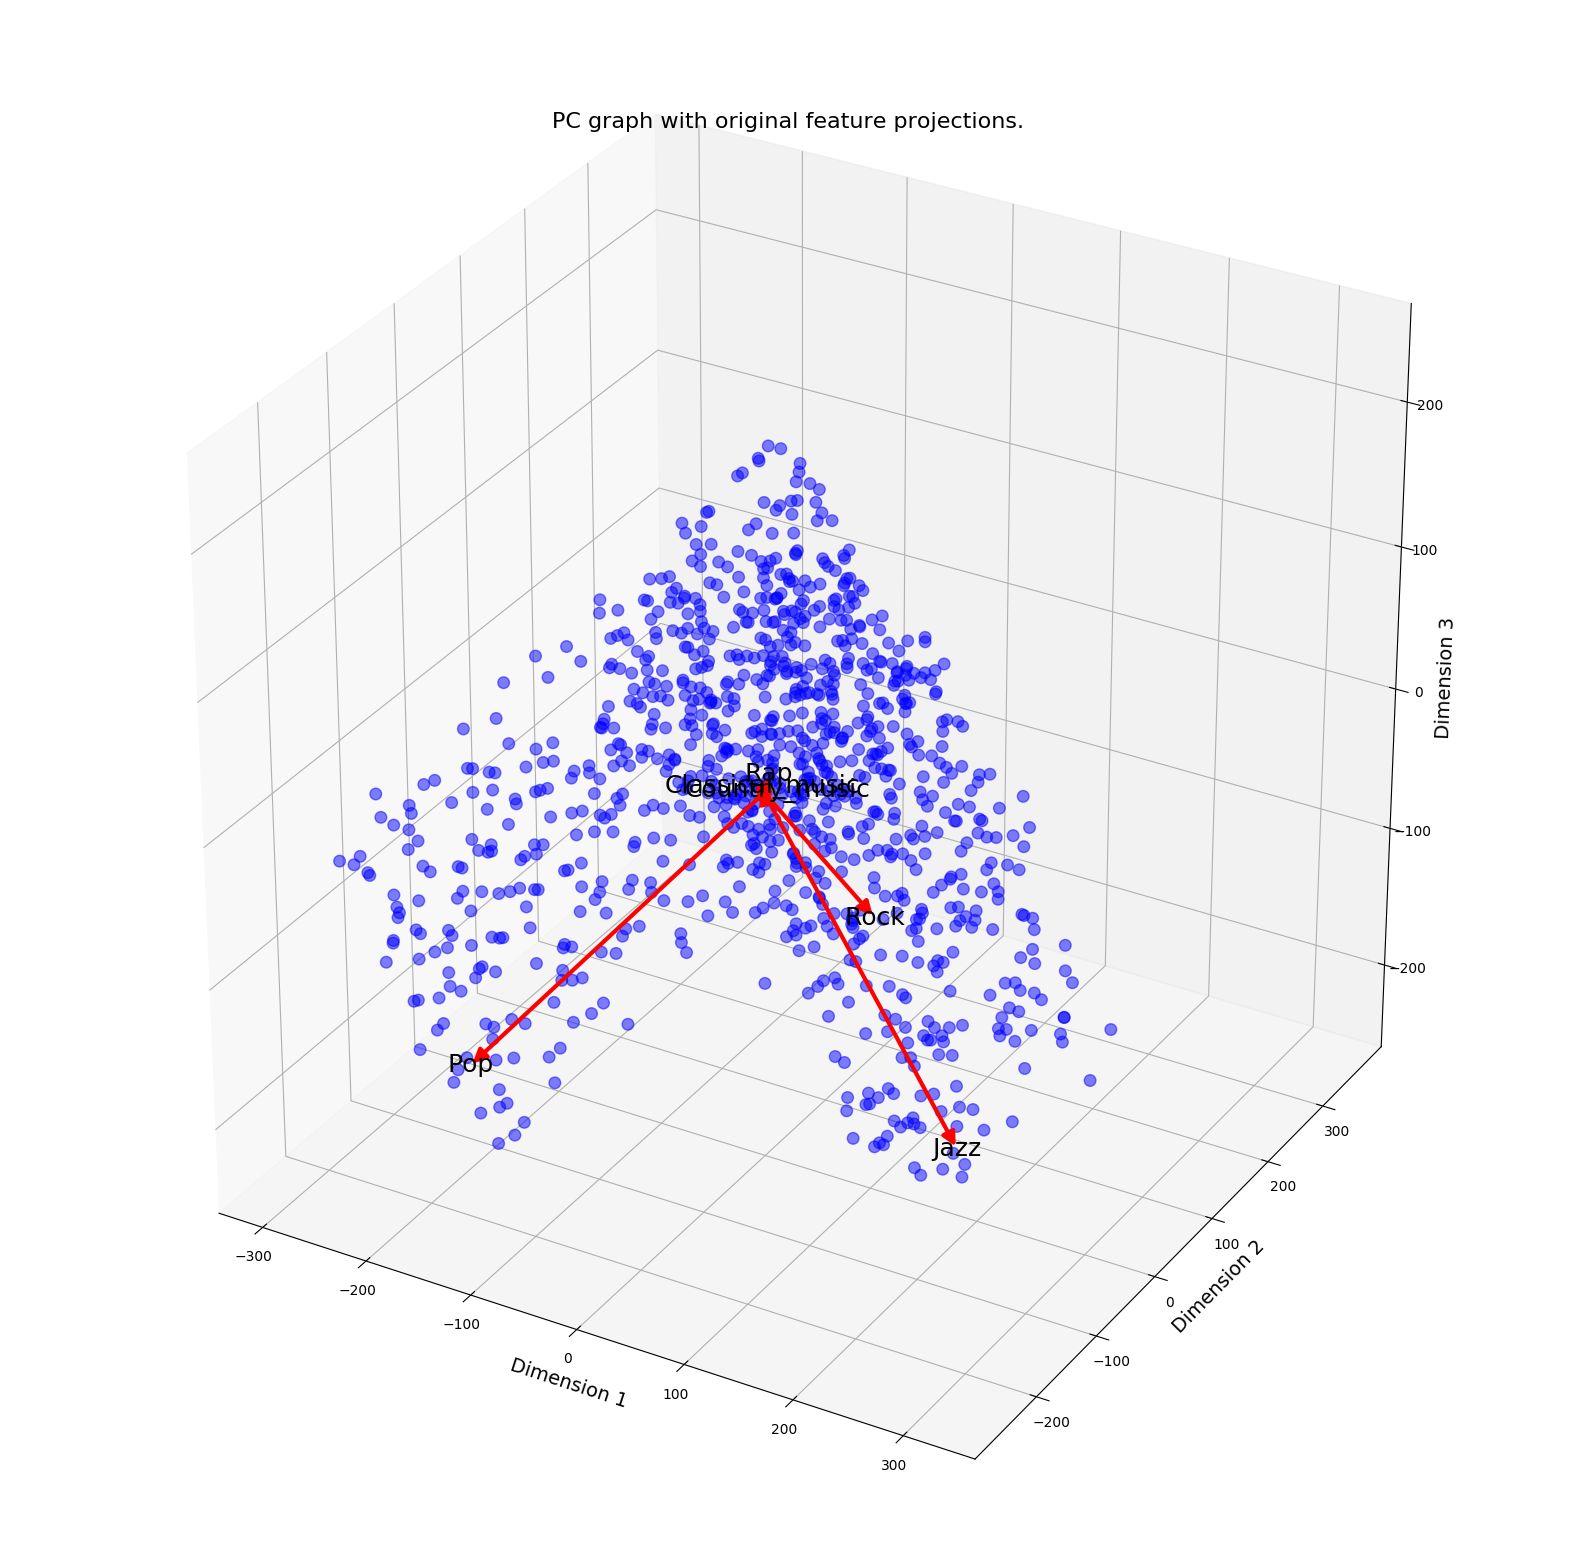

In [21]:
# Create a PCA Plot
vs1.pcaplot(music_data, reduced_data, pca, 300, 300, 20)

plt.rcdefaults()
plt.show()

### Clustering
In order to recommend songs of interest to a user, we'll have to find users that best matches his music taste.
This can be achieved by clustering the users into several clusters based on their music taste and then creating labels for each cluster indicating such a taste. 

The data can be clustered into many clusters but, it is crucial to find the optimal clusters that best describes the user segments. In order to achieve that, several trials of clustering can be done where each time using a different number of clusters and comparing the **Silhouette Score**. Finally, the optimal clustering is the one that produces the highest score.

Below we are going to use **K-means** to find the optimal number of clusters that best fits our data.
Briefly, **K-means** works as follows:
- Pick K random points as cluster centers called centroids.
- Assign each point to nearest cluster by calculating its distance to each centroid.
- Find new cluster center by taking the average of the assigned points.
- Repeat Step 2 and 3 until none of the cluster assignments change.

As we can see from the below results, using 4 clusters yields the highest **Silhouette Score** of 0.39. Therefore, from here onwards, we'll be using 4 clusters.

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

# Check the scores for clustering using 2,...,11 clusters
for i in range(2, 12):

    # Apply clustering 
    # clusterer = GaussianMixture(n_components=4).fit(reduced_data)
    clusterer = KMeans(n_clusters=i, random_state=0).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    # centers = clusterer.means_
    centers = clusterer.cluster_centers_
    
    # Glue back to originaal data
    # labels = clusterer.labels_
    # reduced_data['clusters'] = labels

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data , preds)

    # Print the score
    print("Number of Clusters {} scored {}".format(i, score))

Number of Clusters 2 scored 0.276309350096253
Number of Clusters 3 scored 0.3313175597587002
Number of Clusters 4 scored 0.39054526781589793
Number of Clusters 5 scored 0.3255172150981917
Number of Clusters 6 scored 0.3001158036283717
Number of Clusters 7 scored 0.2841701389467246
Number of Clusters 8 scored 0.2933861093935035
Number of Clusters 9 scored 0.2663526085401687
Number of Clusters 10 scored 0.27029266769547516
Number of Clusters 11 scored 0.25973474065634844


In [23]:
# Cluster the reduced data and print the sample point predictions
clusterer = KMeans(n_clusters=4, random_state=0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

print("Sample Points\n",sample, "\n")
print("Reduced Sample Points\n",pca_samples, "\n")

for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample Points
    Rock  Pop  Jazz  Country_music  Rap  Classical_music
0   385  162    77            125   54               33
1     4   44   455             92   20               32
2    17  427    28             31   89               31
3   190   85    11            126   81               50 

Reduced Sample Points
    Dimension 1  Dimension 2  Dimension 3
0   -85.298703   205.266667  -122.802197
1   318.527617  -153.523614   -21.216690
2  -253.101461  -209.953994   -20.576600
3   -70.625933   116.417218    78.564152 

Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 3


We apply **k-means** clustering again using the number of clusters 4 that resulted in the highest score above.
In the above code, we print 4 sample points within the original dataset and print their reduced values after applying PCA.
Also, we predict the cluster for each sample point that it belongs to and print it.

Finally, we visualize the cluster in 3D dimensions based on the Principle Components discussed above.
Illustration:
- The formation of the 4 clusters is clear and represented by different colors. 
- Each cluster is assigned a number as shown in the top right legend.
- The center of each cluster is highlighted using a wider and stronger colored dot.
- The sample points presented above are marked by an X symbol containing the number of the sample point.

Discussion:
- Sample point 2 is located in the lower left yellow cluster. Looking at features of the point (above prints), we can see that it represents a user who listens heavily to `Pop` genre while not much of the other genres. Looking at the PCA Plot above, we can observe that that particular area is projected with the Pop feature having the most information. Hence it is a correct prediction.
- Sample point 1 is located in the lower right green cluster. Looking at the features of the point (above prints), we can see that it represents a user who listens heavily to `Jazz` genre while not much of the other genres. Also, looking at the PCA plot above, we can observe that that particular area is projected with the Jazz feature having most information. Hence it is a correct prediction.
- Sample point 0 is located in the red cluster and it represents a user who listens mostly to `Rock` genre. Looking at the PCA plot above, it is clear that that area has the most information from the Rock feature. Hence it is a correct prediction.
- Sample point 3 is located in the grey cluster and it represents a user who listens `Rock` and `Country` genres the most while also listening to a good number of songs from `Pop` and `Rap`. This point is slightly harder to link it to the PCA plot above but, it is somehow clear to be in the right cluster as shown by the PCA projection.

Therefore we are able to correctly determine the cluster of these users. Below we'll go deeper into evaluating how accurate the predictions were for all users.

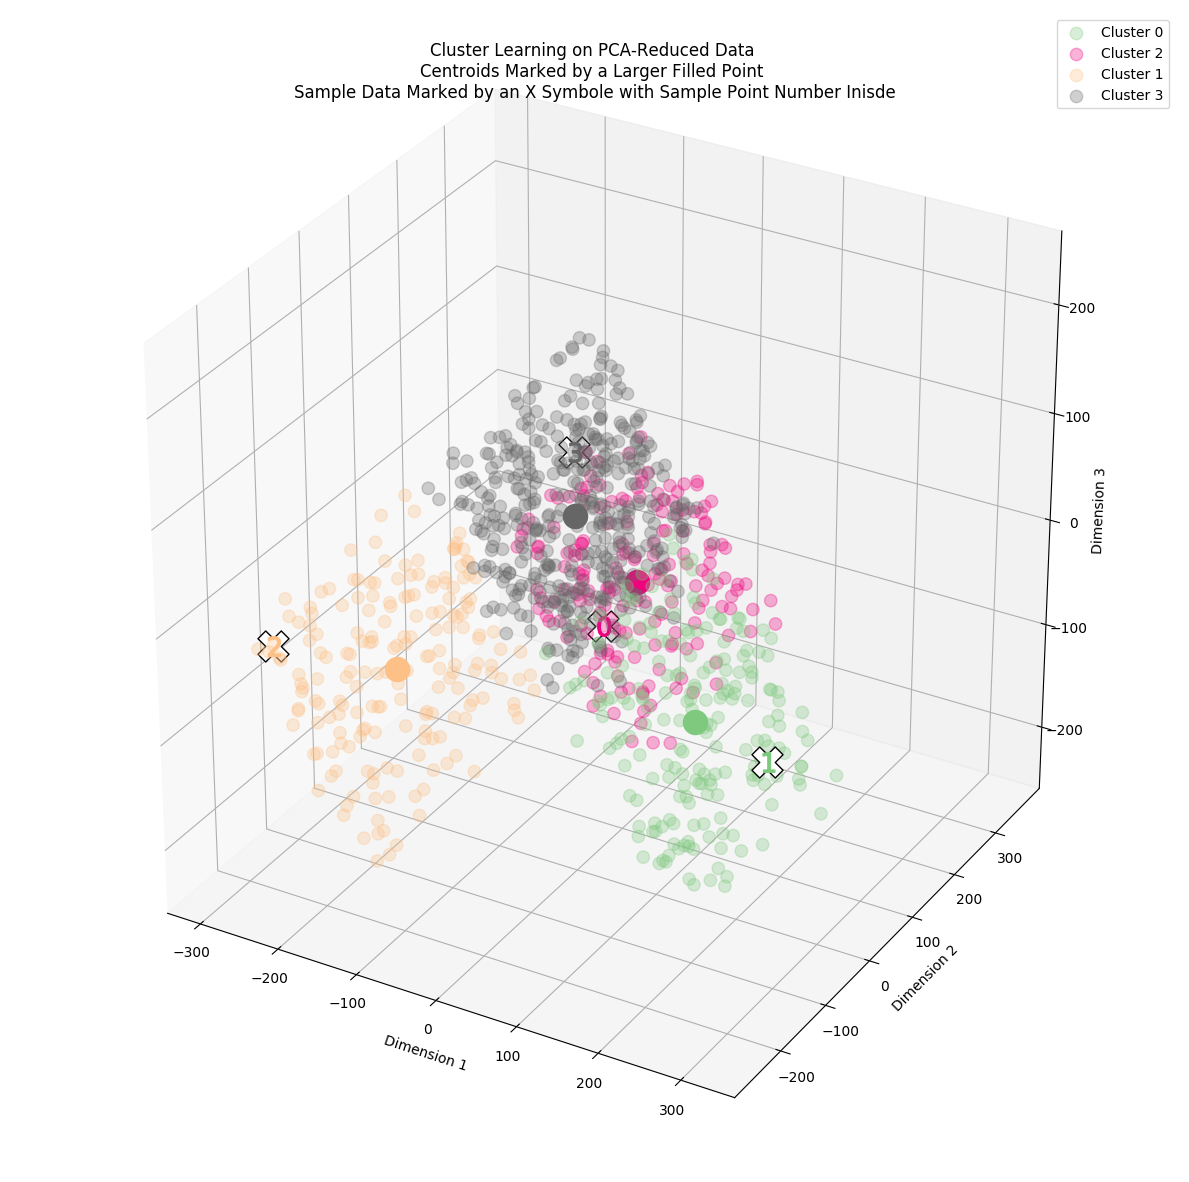

In [24]:
# Show the clusters in 3D
predictions = pd.DataFrame(preds, columns = ['Cluster'])
df = pd.concat([predictions, reduced_data], axis = 1)
sample_predictions = pd.DataFrame(sample_preds, columns = ['Cluster'])
df_sample = pd.concat([sample_predictions, pca_samples], axis = 1)
vs1.cluster_results_3d(df, df_sample, centers)

### Recommending Songs

#### Recommending for a Seen User

In this section, we are going to use the 2nd dataset at hand (top songs) in order to recommend a song for a user that fits the user's taste.
The following steps are performed:
- For each cluster create a list of the top played songs listened to by users within that cluster.
- Determine the cluster the user is within.
- Randomly select a song from the gathered list. 

In [25]:
import random

# Create a dictionary for easier recomendtion
# keys = cluster number
# values = a list containing a random song from the each users top 15 songs within the same cluster
results = {}
for i, cluster in df.groupby('Cluster', sort=False):
    holder = []
    for index, row in cluster.iterrows():
        top_songs = data_topsongs.loc[index].values.tolist()
        random_song = random.choice(top_songs)
        holder.append(random_song)
    results[i] = holder

def recomendSongForUser(userId):
    if userId in data.index:
        max_trials = 11
        count =0 
        recommended_song = random.choice(results[i])
        while recommended_song in data_topsongs.loc[userId].values.tolist() and count < max_trials:
            recommended_song = random.choice(results[i])
        print("Recommending Song ID {} to User {}".format(recommended_song, userId))
    else:
        print("User doesn't exist")
        
# Recommed a song for user
recomendSongForUser(10)

Recommending Song ID 440 to User 10


# Results

## Model Evaluation and Validation

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# One hot encoding of categorical features
new_data = pd.get_dummies(data)

# Create clusters based on the PCA reduced data
clusterer = KMeans(n_clusters=4, random_state=0).fit(reduced_data)

# Get cluster label to add as an engineered label
labels = clusterer.labels_

# Glue back to original data
new_data['Cluster'] = labels

print(new_data.head())

# Remove target label 
new_data_no_target = new_data.drop(['Cluster'], axis=1)

# Split the data into training and testing sets(0.25)
X_train, X_test_gold, y_train, y_test_gold = train_test_split(new_data_no_target, new_data["Cluster"],
                                                              test_size=0.25, random_state=50)

# Create a decision tree classifier and fit it to the training set
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Calculate the score using the Gold Data
y_pred = clf.predict(X_test_gold)
print("Gold Model Score: ", f1_score(y_test_gold, y_pred, average='micro'))

   Age  Rock  Pop  Jazz  Country_music  Rap  Classical_music  70s  80s  90s  \
0   89    14  188   456             71   79              111  138  543   78   
1   18   385  162    77            125   54               33  327  128   21   
2   55     4   44   455             92   20               32   15  496   16   
3   67     4  184   271            103  100              108   59  335  115   
4   21    17  427    28             31   89               31   29  120    4   

    ...     Country_br  Country_ca  Country_de  Country_fr  Country_jo  \
0   ...              0           0           0           0           1   
1   ...              0           0           0           0           0   
2   ...              0           0           0           0           1   
3   ...              0           0           0           0           1   
4   ...              0           0           0           0           0   

   Country_ksa  Country_leb  Country_uae  Country_us  Cluster  
0            0  

### Random Benchmark

In [27]:
import random

new_data_naive = pd.get_dummies(data)
# Randomly assign each user to a cluster (out of 11 clusters based on genres and categories)
new_data_naive['Cluster'] = 0
for index, row in new_data_naive.iterrows():
        new_data_naive.set_value(index,'Cluster',random.randint(0, 11))
            
print(new_data_naive.head())

X_train, X_test, y_train, y_test = train_test_split(new_data_no_target, new_data_naive["Cluster"],
                                                    test_size=0.25, random_state=50)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

print("Random Model Benchmark ", f1_score(y_test_gold, clf.predict(X_test_gold), average='micro'))

   Age  Rock  Pop  Jazz  Country_music  Rap  Classical_music  70s  80s  90s  \
0   89    14  188   456             71   79              111  138  543   78   
1   18   385  162    77            125   54               33  327  128   21   
2   55     4   44   455             92   20               32   15  496   16   
3   67     4  184   271            103  100              108   59  335  115   
4   21    17  427    28             31   89               31   29  120    4   

    ...     Country_br  Country_ca  Country_de  Country_fr  Country_jo  \
0   ...              0           0           0           0           1   
1   ...              0           0           0           0           0   
2   ...              0           0           0           0           1   
3   ...              0           0           0           0           1   
4   ...              0           0           0           0           0   

   Country_ksa  Country_leb  Country_uae  Country_us  Cluster  
0            0  

### Greedy Benchmark

In [28]:
new_data_naive = pd.get_dummies(data)
# Follow a greedy approach where each user is assigned to a cluster based on his highest music genre listened to
new_data_naive['Cluster'] = 0
for index, row in new_data_naive.iterrows():
    max_genre = new_data_naive.loc[index].max()
    if max_genre == row['Rock']:
        new_data_naive.set_value(index,'Cluster',0)
    elif max_genre == row['Pop']:
        new_data_naive.set_value(index,'Cluster',1)
    elif max_genre == row['Jazz']:
        new_data_naive.set_value(index,'Cluster',2)
    elif max_genre == row['Country_music']:
        new_data_naive.set_value(index,'Cluster',3)
    elif max_genre == row['Rap']:
        new_data_naive.set_value(index,'Cluster',4)
    elif max_genre == row['Classical_music']:
        new_data_naive.set_value(index,'Cluster',5)
    elif max_genre == row['70s']:
        new_data_naive.set_value(index,'Cluster',6)    
    elif max_genre == row['80s']:
        new_data_naive.set_value(index,'Cluster',7)
    elif max_genre == row['90s']:
        new_data_naive.set_value(index,'Cluster',8)
    elif max_genre == row['2000s']:
        new_data_naive.set_value(index,'Cluster',9)
    elif max_genre == row['Recent_music']:
        new_data_naive.set_value(index,'Cluster',10)
display(new_data_naive[:4])

X_train, X_test, y_train, y_test = train_test_split(new_data_no_target, new_data_naive["Cluster"],
                                                    test_size=0.25, random_state=50)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("Greedy Model Benchmark ", f1_score(y_test_gold, clf.predict(X_test_gold), average='micro'))

,Age,Rock,Pop,Jazz,Country_music,Rap,Classical_music,70s,80s,90s,...,Country_br,Country_ca,Country_de,Country_fr,Country_jo,Country_ksa,Country_leb,Country_uae,Country_us,Cluster
0,89,14,188,456,71,79,111,138,543,78,...,0,0,0,0,1,0,0,0,0,7
1,18,385,162,77,125,54,33,327,128,21,...,0,0,0,0,0,0,1,0,0,0
2,55,4,44,455,92,20,32,15,496,16,...,0,0,0,0,1,0,0,0,0,7
3,67,4,184,271,103,100,108,59,335,115,...,0,0,0,0,1,0,0,0,0,7


Greedy Model Benchmark  0.08


### Smart Greedy Benchmark

In [29]:
new_data_naive = pd.get_dummies(data)
# Follow a greedy appraoch where each user is assigned to a cluster based on music genre only
new_data_naive['Cluster'] = 0
for index, row in new_data_naive.iterrows():
    max_genre = new_data_naive[['Rock','Pop', 'Jazz', 'Country_music', 'Rap', 'Classical_music']].loc[index].max()
    if max_genre == row['Rock']:
        new_data_naive.set_value(index,'Cluster',0)
    elif max_genre == row['Pop']:
        new_data_naive.set_value(index,'Cluster',1)
    elif max_genre == row['Jazz']:
        new_data_naive.set_value(index,'Cluster',2)
    elif max_genre == row['Country_music']:
        new_data_naive.set_value(index,'Cluster',3)
    elif max_genre == row['Rap']:
        new_data_naive.set_value(index,'Cluster',4)
    elif max_genre == row['Classical_music']:
        new_data_naive.set_value(index,'Cluster',5)
print(new_data_naive.head())

X_train, X_test, y_train, y_test = train_test_split(new_data_no_target, new_data_naive["Cluster"],
                                                    test_size=0.25, random_state=50)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("Smart Greedy Benchmark ", f1_score(y_test_gold, clf.predict(X_test_gold), average='micro'))

   Age  Rock  Pop  Jazz  Country_music  Rap  Classical_music  70s  80s  90s  \
0   89    14  188   456             71   79              111  138  543   78   
1   18   385  162    77            125   54               33  327  128   21   
2   55     4   44   455             92   20               32   15  496   16   
3   67     4  184   271            103  100              108   59  335  115   
4   21    17  427    28             31   89               31   29  120    4   

    ...     Country_br  Country_ca  Country_de  Country_fr  Country_jo  \
0   ...              0           0           0           0           1   
1   ...              0           0           0           0           0   
2   ...              0           0           0           0           1   
3   ...              0           0           0           0           1   
4   ...              0           0           0           0           0   

   Country_ksa  Country_leb  Country_uae  Country_us  Cluster  
0            0  